In [1]:
import sqlite3
import pandas as pd
import folium
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans2, whiten

from scripts import write_weather_data

conn = sqlite3.connect(r'locations.db')
df_weather = pd.read_sql_query("SELECT min_temp, max_temp, City.city_id, timestamp, name, \
                               City.country_id, City.lat,City.lon \
                               FROM Weather JOIN City ON (Weather.city_id=City.city_id)", conn)
df_city = pd.read_sql_query("Select City.name, city_id, lat, lon, Country.name as CountryName, Continent.name as ContinentName from City \
                            Join Country ON (City.country_id=Country.id) \
                            JOIN Continent ON (Country.continent_id=Continent.id)"
                            , conn)

In [2]:
df_city.columns

Index(['name', 'city_id', 'lat', 'lon', 'CountryName', 'ContinentName'], dtype='object')

In [3]:
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [4]:
continent_colors = {
    'Asia': 'red',
    'Africa': 'blue',
    'Oceania': 'orange',
    'Europe': 'pink',
    'North America': 'green',
    'South America': 'magenta'
}

In [5]:
for city in write_weather_data.city_list:
    target_city = df_city.get(df_city['name']== city)
    folium.Icon(location=[target_city['lat'], target_city['lon']],
                icon=folium.Icon(color=continent_colors[target_city.ContinentName.iloc[0]], icon="info-sign"),
                popup=target_city.name.iloc[0]).add_to(m)
    


<ipython-input-5-fa0f5de47a04>:4: UserWarning: color argument of Icon should be one of: {'gray', 'green', 'lightgreen', 'lightred', 'darkred', 'blue', 'pink', 'lightgray', 'black', 'orange', 'white', 'lightblue', 'darkblue', 'red', 'cadetblue', 'darkgreen', 'darkpurple', 'purple', 'beige'}.
  icon=folium.Icon(color=continent_colors[target_city.ContinentName.iloc[0]], icon="info-sign"),


In [6]:
m

TypeError: Object of type Icon is not JSON serializable

In [7]:
city_continent = df_city.get(df_city['ContinentName']=='Oceania')

In [8]:
#coordinates = city_continent[['lat', 'lon']]
coordinates = df_city[['lat', 'lon']]
np_coordinates = coordinates.to_numpy()

In [9]:
x, y = kmeans2(whiten(np_coordinates), 4, iter = 20) 

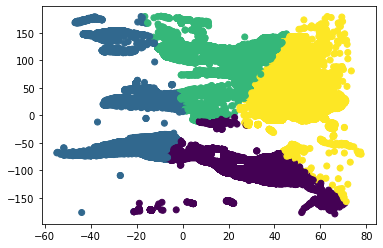

In [10]:
plt.scatter(np_coordinates[:,0], np_coordinates[:,1], c=y)
plt.show()